0 (4, 4, 2)
1 (4, 4, 2, 2)
2 (4, 4, 2, 2)
3 (4, 4, 2)
(4, 4, 4)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


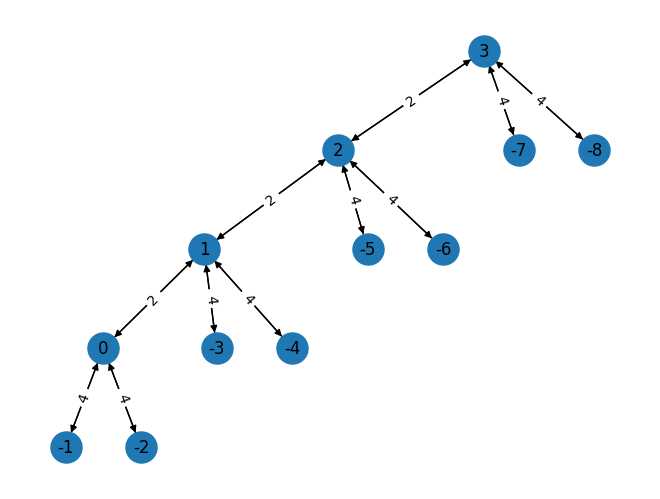

In [4]:
from qutree import *

G = tensor_train_operator_graph(4, 2, 4)
plot_tree(G)
tn = create_tensors(G, np.arange)

for node in G.nodes:
    if is_leaf_node(node, G):
        continue
    A = G.nodes[node]['A']
    print(node, A.shape)

A = G.nodes[1]['A']
A = A.reshape([4, 4, 4])
print(A.shape)
for i in range(4):
    for j in range(4):
        Ai = A[:, :, i]
        Aj = A[:, :, i]
        print(np.linalg.norm(Ai@Aj - Aj@Ai))

In [5]:
%pip install numba

Note: you may need to restart the kernel to use updated packages.


In [7]:
from qutree.matrix_factorizations.approximate_joint_diagonalization.jade.jade_cpu import *

m = 1
A = np.arange(m*4*4).reshape([m, 4, 4])
for i in range(m):
    A[i, :, :] = 0.5 * (A[i, :, :] + A[i, :, :].T)
l, U = np.linalg.eig(A[0, :, :])
print('U=', U)
B, V = jade(A)
print('V=', V)
print('UV.T=', U.T@V)
#print(A, V)
print(B, V.shape)
X = V[None, :, :] @ B @ V.T[None, :, :]
X2 = U[:, :] @ np.diag(l) @ U.T[:, :]
print(X2)


U= [[ 0.25462928  0.77485095  0.5        -0.29115277]
 [ 0.40322372  0.42882659 -0.5         0.63523097]
 [ 0.54276615 -0.10613594 -0.5        -0.66643835]
 [ 0.69136059 -0.45216029  0.5         0.2599454 ]]
V= [[ 0.92660185  0.1751468   0.22674662  0.24355405]
 [-0.32503438  0.81493245  0.28100356  0.38894054]
 [-0.18910752 -0.54249411  0.62804493  0.52487908]
 [ 0.         -0.10444534 -0.68933485  0.71687421]]
UV.T= [[ 0.00223723  0.00654077  0.03534621  0.99935122]
 [ 0.59866604  0.58998153  0.54122834 -0.02434445]
 [ 0.72037188 -0.10086844 -0.68581836  0.02330432]
 [-0.3502261   0.80106465 -0.48525839  0.01270425]]
[[[ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0 27]]] (4, 4)
[[-1.10189635e-14  2.00000000e+00  5.00000000e+00  7.00000000e+00]
 [ 2.00000000e+00  5.00000000e+00  7.00000000e+00  1.00000000e+01]
 [ 5.00000000e+00  7.00000000e+00  1.00000000e+01  1.20000000e+01]
 [ 7.00000000e+00  1.00000000e+01  1.20000000e+01  1.50000000e+01]]


In [52]:
#%pip install qndiag
from qndiag import qndiag

n, p = 1, 3
diagonals = np.random.uniform(size=(n, p))
A = np.random.randn(p, p)  # mixing matrix
C = np.array([A.dot(d[:, None] * A.T) for d in diagonals])  # dataset
print(C)

B, _ = qndiag(C, verbose=True)  # use the algorithm

print(B)
print(B.dot(A))  # Should be a permutation + scale matrix

[[[ 0.72367201 -0.43830179 -0.51859111]
  [-0.43830179  0.3905813   0.34070491]
  [-0.51859111  0.34070491  2.2740043 ]]]
Running quasi-Newton for joint diagonalization
  iter   |   obj    | gradient
[[-1.92692724 -2.76259886 -0.02655989]
 [ 0.86204154 -0.60545526  0.43443941]
 [-0.19922593  0.1333735   0.581192  ]]
[[ 0.62398461  0.79310751  1.1717946 ]
 [-0.41793583  0.97077634 -1.06834781]
 [-0.98711167  0.09032886  1.19305917]]


In [64]:
m, n = 2, 3
A = np.random.rand(m*n**2).reshape([m, n, n])
A = np.array(A, dtype=np.float64)
print(A)

print(off_diagonal_measure(A))

[[[0.37276082 0.37867362 0.73385937]
  [0.82779803 0.31451604 0.44976974]
  [0.3006471  0.57176981 0.68418196]]

 [[0.55199033 0.67551182 0.9607811 ]
  [0.0346798  0.70235927 0.54809313]
  [0.36529511 0.72240288 0.75990024]]]
(2.9380435655827126, array([[[0.        , 0.37867362, 0.73385937],
        [0.82779803, 0.        , 0.44976974],
        [0.3006471 , 0.57176981, 0.        ]],

       [[0.        , 0.67551182, 0.9607811 ],
        [0.0346798 , 0.        , 0.54809313],
        [0.36529511, 0.72240288, 0.        ]]]))


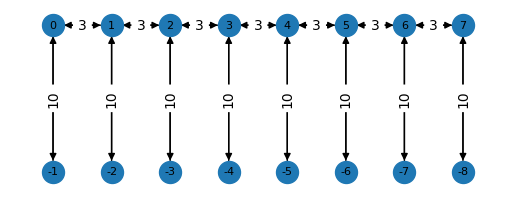

In [1]:
from qutree import *

tt = tensor_train_graph(8, 3, 10)
#plot_tree(tt)
plot_tt_diagram(tt)

In [1]:
from qutree.matrix_factorizations.simultaneous_diagonalization import *
from qutree.matrix_factorizations.simul_diag import *

def rot_random(A):
    assert len(A.shape) == 3
    n = A.shape[1]
    U = np.random.randn(n, n)
    U, _ = np.linalg.qr(U)
    B = []
    for i in range(A.shape[0]):
        B.append(U @ A[i] @ U.T)
    return np.array(B)

def test_mats_1():
    np.random.seed(6)
    a0 = np.arange(4)
    a1 = np.array([2, 3, 1, 2])
    A = np.array([np.diag(a0), np.diag(a1)])
    return rot_random(A)

def test_mats_2():
    a1 = np.array([[0, 1], [1, 0]])
    a0 = np.eye(2)
    print(np.linalg.norm(a0 @ a1 - a1 @ a0))
    A = np.array([a0, a1])
    return A#rot_random(A)

def test_simultaneous_diagonalization():
    A = test_mats_2()

    ev, evec = np.linalg.eigh(A[0])

    a, U = simultaneous_diagonalization(A, n_iter=100, eps=1e-14, verbose=False)
    print('U = ', U)

    print(a)
    assert off_diagonal_measure(a) < 1e-7
    assert np.allclose(U @ U.T, np.eye(U.shape[0]))
    a[0] = U @ a[0] @ U.T
    a[1] = U @ a[1] @ U.T
    assert np.allclose(a, A)

test_simultaneous_diagonalization()
#I = np.eye(2)
#U = np.random.randn(2, 2)
#U = np.linalg.qr(U)[0]
#print(U @ I @ U.T, U)
#

0.0
real
U =  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[[ 1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00]]

 [[ 1.00000000e+00  2.22044605e-16]
  [ 2.22044605e-16 -1.00000000e+00]]]


In [30]:
"""
1 0 0 1
0 1 1 0
0 1 1 0
1 0 0 1
"""
A = np.array([[4, 0, 0, 1], [0, 1, 3, 0], [0, 3, 1, 0], [1, 0, 0, 4]])
print(A)
A = A.reshape([2, 2, 2, 2])
#A = A.transpose([2, 3, 0, 1])
A = A.transpose([0, 2, 1, 3])
A = A.reshape([4, 4])
U, s, V = np.linalg.svd(A)
U = U[:, :3].reshape([2, 2, 3])
s = s[:3]
V = V[:3, :].reshape([3, 2, 2])
print('U = ', U.T)
print(s)
print(V)
A = A.reshape([2, 2, 2, 2])
print(A)

[[4 0 0 1]
 [0 1 3 0]
 [0 3 1 0]
 [1 0 0 4]]
U =  [[[-0.70710678  0.        ]
  [ 0.         -0.70710678]]

 [[ 0.         -0.70710678]
  [-0.70710678  0.        ]]

 [[ 0.70710678  0.        ]
  [ 0.         -0.70710678]]]
[5. 4. 3.]
[[[-0.70710678  0.        ]
  [-0.         -0.70710678]]

 [[-0.         -0.70710678]
  [-0.70710678  0.        ]]

 [[ 0.70710678  0.        ]
  [-0.         -0.70710678]]]
[[[[4 0]
   [0 1]]

  [[0 1]
   [3 0]]]


 [[[0 3]
   [1 0]]

  [[1 0]
   [0 4]]]]


In [3]:
import numpy as np
n = 2
N = n * n
m = 2
T = []
for i in range(m):
    T.append(i)
    T.append(i + m)
#print(T)
A = np.random.randn(N, N)
A = A @ A.T
print(A.reshape(4, 4))
A = A.reshape([n, n] * m)
A = A.transpose([0, 2, 1, 3])
A = A.reshape([N, N])
U, s, V = np.linalg.svd(A)
A1 = np.outer(U[:, 1], V[1, :])
U = U.reshape([n, n, N])
V = V.reshape([N, n, n])
print(U.shape)
print(s)
print(U[1])
# 10 herm, 6 antiherm
print(V[1])
A1 = A1.reshape([n, n, n, n])
A1 = A1.transpose([0, 2, 1, 3])
print(A1.reshape(4, 4))

[[ 5.8683763  -2.15381452  0.35695742  1.04409015]
 [-2.15381452  6.53421105 -1.89069624 -0.80158678]
 [ 0.35695742 -1.89069624  7.46498064  2.58771522]
 [ 1.04409015 -0.80158678  2.58771522  1.16763232]]
(2, 2, 4)
[10.93370016  6.1147495   2.93478639  1.48799556]
[[ 1.11925203e-02 -1.36635152e-02  7.07106781e-01 -7.06886155e-01]
 [-6.34667466e-01 -7.72769899e-01 -2.25856804e-17  4.88795085e-03]]
[[-0.3361733  -0.54859217]
 [-0.54859217  0.53392957]]
[[-0.21326568 -0.34802252  0.00459331  0.0074957 ]
 [-0.34802252  0.33872068  0.0074957  -0.00729535]
 [ 0.00459331  0.0074957   0.25978461  0.42393551]
 [ 0.0074957  -0.00729535  0.42393551 -0.4126047 ]]


In [91]:
A = np.random.randn(3, 3)
A = 0.5 * (A - A.T)
Aref = A.copy()
print(A)
c = 0.3
s = np.sqrt(1. - c**2+1e-10)
J = np.zeros((3, 3))
J[0, 0] = c
J[0, 1] = -s
J[1, 0] = s
J[1, 1] = c
J[2, 2] = 1
print(J)
print(J @ J.T)
print(J @ A @ J.T - Aref)
print(A - Aref)

[[ 0.         -0.54251405  1.61449944]
 [ 0.54251405  0.          0.55857923]
 [-1.61449944 -0.55857923  0.        ]]
[[ 0.3       -0.9539392  0.       ]
 [ 0.9539392  0.3        0.       ]
 [ 0.         0.         1.       ]]
[[ 1.00000000e+00 -2.27158381e-17  0.00000000e+00]
 [-2.27158381e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.96385604e-17 -5.42514922e-11 -1.66300023e+00]
 [ 5.42514922e-11  2.23990317e-17  1.14912885e+00]
 [ 1.66300023e+00 -1.14912885e+00  0.00000000e+00]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [12]:
import numpy as np
n = 3
mdim = [2**n, 2**n]
tdim = [2] * (2 * n)
vdim = 2**(2*n)
A = np.random.randn(vdim)
A = A.reshape(mdim)
A = 0.5 * (A + A.T)
print(A.reshape(mdim))

# function that selects 2 index subsystems


[[ 0.32391776 -0.71812228  0.18394271  0.67381288 -0.04308178 -0.80212454
   0.45557957  0.15807367]
 [-0.71812228  0.82438999  0.0523187   0.54163725  1.0488145  -0.24150761
  -0.41390434 -0.74288786]
 [ 0.18394271  0.0523187   0.17539749 -0.07231866  0.61170134 -0.05774714
   1.15264935  0.68355486]
 [ 0.67381288  0.54163725 -0.07231866 -0.39699248 -0.10158884  1.03411122
  -0.78391461  0.19907352]
 [-0.04308178  1.0488145   0.61170134 -0.10158884 -0.15764275  0.30820513
  -0.96404854  0.69571853]
 [-0.80212454 -0.24150761 -0.05774714  1.03411122  0.30820513  0.15174781
   0.23796796 -1.33963306]
 [ 0.45557957 -0.41390434  1.15264935 -0.78391461 -0.96404854  0.23796796
  -0.29765225 -0.39045235]
 [ 0.15807367 -0.74288786  0.68355486  0.19907352  0.69571853 -1.33963306
  -0.39045235 -1.22256074]]
